# Sales Analysis


Import Necessary Libraries


In [148]:
import pandas as pd
import os
import matplotlib.pyplot as plt

from itertools import combinations
from collections import Counter

#### Task #1: Merge the 12 months of sales data into a single CSV file

In [149]:
path = "D:\Code\Sales Analysis\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data"

files = [file for file in os.listdir(path)if not file.startswith('.')] # Ignore hidden files
all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv(path + "/" + file)
    all_months_data = pd.concat([all_months_data, df]) # Concatenate pandas objects along a particular axis
    
all_months_data.to_csv("all_data.csv", index=False) # Write pandas objects to csv file

Read in updated dataframe

In [150]:
data = pd.read_csv("all_data.csv")
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


Clean up the data!

###### Drop rows of NaN

In [151]:
nan_df = data[data.isna().any(axis = 1)]
nan_df.head()

data = data.dropna(how='all')
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


###### Find 'Or' and delete it

In [152]:
data = data[data['Order Date'].str[0:2] != 'Or']

###### Convert columns to the correct type

In [153]:
data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'])
data['Price Each'] = pd.to_numeric(data['Price Each'])

### Augment data with additional columns


#### Task #2: Add Month Column

In [154]:
data['Month'] = data['Order Date'].str[0:2]
data['Month'] = data['Month'].astype('int32')
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Task #3: Add a sales column

In [155]:
data['Sales'] = data['Quantity Ordered'] * data['Price Each']
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Task #4: Add a city column

In [156]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

data['City'] = data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


#### Question 1: What was the best month for sales? How much was earned that month?

In [157]:
results = data.groupby('Month').sum()

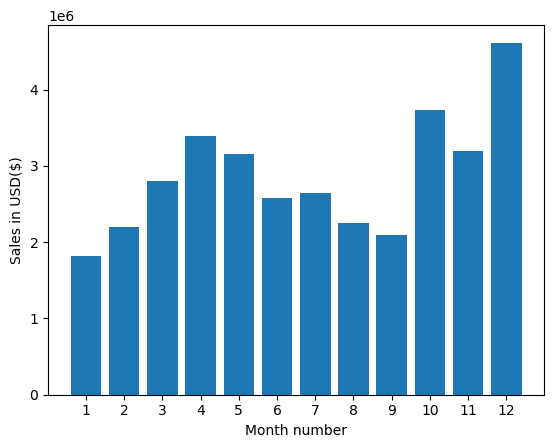

In [158]:
months = range(1, 13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD($)')
plt.xlabel('Month number')
plt.show()

#### Question 2: What city had the highest number of sales?

In [159]:
results = data.groupby('City').sum()

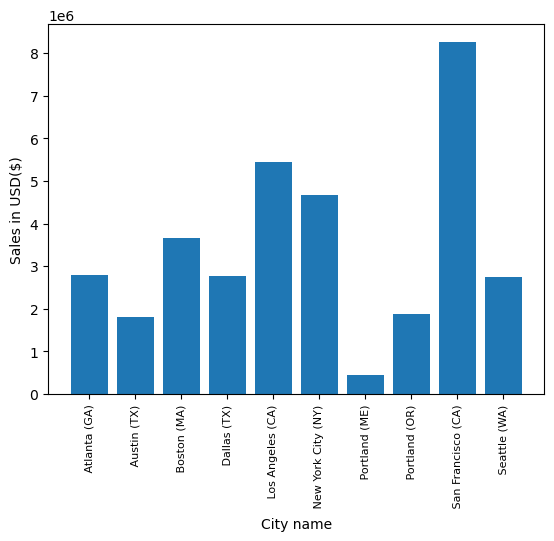

In [160]:
cities = [city for city, df in data.groupby('City')]

plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation='vertical', size = 8)
plt.ylabel('Sales in USD($)')
plt.xlabel('City name')
plt.show()

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product

In [161]:
data['Order Date'] = pd.to_datetime(data['Order Date'])

C:\Users\qhuy9\AppData\Local\Temp\ipykernel_7208\3021409918.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Order Date'] = pd.to_datetime(data['Order Date'])


In [162]:
data['Hour'] = data['Order Date'].dt.hour
data['Minute'] = data['Order Date'].dt.minute

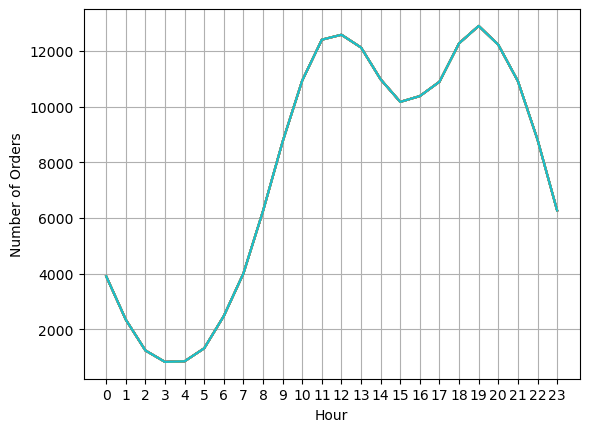

In [163]:
hours = [hour for hour, df in data.groupby('Hour')]

plt.plot(hours, data.groupby('Hour').count())
plt.xticks(hours)
plt.xlabel("Hour")
plt.ylabel("Number of Orders")
plt.grid()
plt.show()

#Insight: recommending advertisements during 11A.M. to 7P.M.

#### Question 4: What products are most often sold together

In [164]:
df = data[data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

C:\Users\qhuy9\AppData\Local\Temp\ipykernel_7208\1431973040.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))


,Order ID,Grouped
3,176560,"Google Phone, Wired Headphones"
18,176574,"Google Phone, USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
32,176586,"AAA Batteries (4-pack), Google Phone"
119,176672,"Lightning Charging Cable, USB-C Charging Cable"


In [165]:
count = Counter()
for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value, in count.most_common(10):
    print(key, value)

('iPhone', ' Lightning Charging Cable') 1005
('Google Phone', ' USB-C Charging Cable') 987
('iPhone', ' Wired Headphones') 447
('Google Phone', ' Wired Headphones') 414
('Vareebadd Phone', ' USB-C Charging Cable') 361
('iPhone', ' Apple Airpods Headphones') 360
('Google Phone', ' Bose SoundSport Headphones') 220
('Vareebadd Phone', ' Wired Headphones') 143
(' USB-C Charging Cable', ' Wired Headphones') 120
('Vareebadd Phone', ' Bose SoundSport Headphones') 80


#### Question 5: What product sold the most? Why do you think it sold the most?

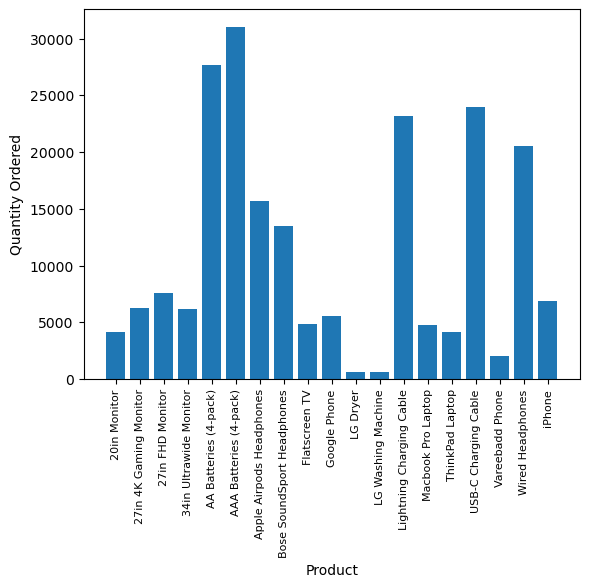

In [166]:
product_group = data.groupby('Product')
quantity_ordered = product_group['Quantity Ordered'].sum()

products = [product for product, df, in product_group]
plt.bar(products, quantity_ordered)
plt.xticks(products, rotation='vertical', size=8)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.show()

C:\Users\qhuy9\AppData\Local\Temp\ipykernel_7208\1429599711.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


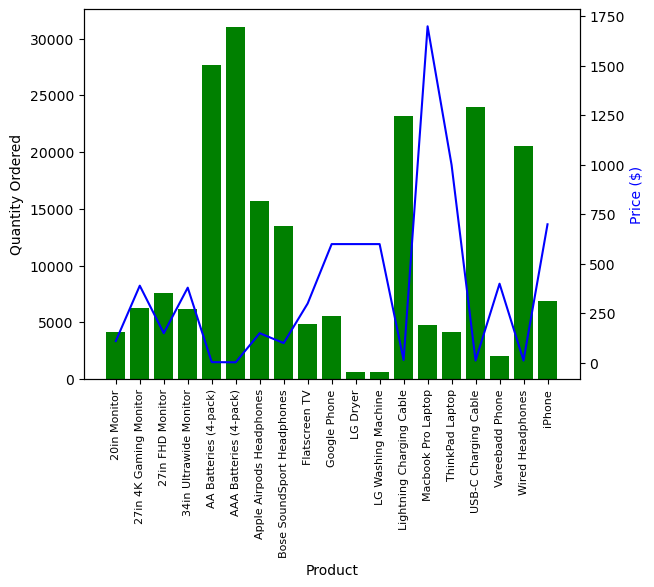

In [167]:
prices = data.groupby('Product')['Price Each'].mean()

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xticklabels(products, rotation='vertical', size=8)
ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered')
ax2.set_ylabel('Price ($)', color='b')

plt.show()
